<a href="https://colab.research.google.com/github/Isanghada/_FINAL_PROJECT-CODE-/blob/main/CLIP_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0


/bin/bash: conda: command not found


In [2]:
!pip install ftfy regex tqdm

     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=68a80adbe4389cfc952ff14b4bb62a70981ab36dd046c08d069d36a16b01540c
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [3]:
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-euqrtm_j
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-euqrtm_j
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369108 sha256=1ead2c2fc2ecb0d11873750f9307f66edfb6734a2b19de606f29d5a5bcca9541
  Stored in directory: /tmp/pip-ephem-wheel-cache-fu5wml7y/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip


In [4]:
import os
import clip
import torch
from torchvision.datasets import CIFAR100


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 179MiB/s]


In [6]:
device

'cuda'

In [7]:
cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/.cache/cifar-100-python.tar.gz to /root/.cache


In [31]:
from PIL import Image

image2 = Image.open("/content/drive/MyDrive/Final_pro/김준형/193_신양신산해안도로.jpg")
print(type(image2))
image2.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


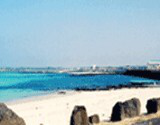

In [33]:
image2

In [28]:
type(image2)

str

In [42]:

text_snippets = ["beautiful ocean", "green olcanic Cone", "theme park","zoo"]

# pre-process text
text_inputs = clip.tokenize(text_snippets).to(device)
print(text_inputs.shape)

torch.Size([4, 77])


In [43]:
image_input = preprocess(image2).unsqueeze(0).to(device)

In [8]:
image, class_id = cifar100[3637]
image_input = preprocess(image2).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar100.classes]).to(device)

In [23]:
text_inputs[3]

tensor([49406,   320,  1125,   539,   320,  4298, 49407,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0], device='cuda:0')

In [27]:
type(image)

PIL.Image.Image

In [16]:
class_id

78

In [44]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [45]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(4)

In [47]:
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{text_snippets[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

 beautiful ocean: 95.46%
green olcanic Cone: 2.39%
      theme park: 1.20%
             zoo: 0.94%


# 음식

In [119]:
from PIL import Image

image2 = Image.open("/content/drive/MyDrive/Final_pro/김준형/3577_제주돔베막국수.jpg")
print(type(image2))
image2.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [120]:
image_input = preprocess(image2).unsqueeze(0).to(device)

In [121]:
text_snippets = ["chicken", "pork","chiness food","sea food","noodle"]

# pre-process text
text_inputs = clip.tokenize(text_snippets).to(device)
print(text_inputs.shape)

torch.Size([5, 77])


In [122]:
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [123]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

In [124]:
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{text_snippets[index]:>16s}: {100 * value.item():.2f}%")


Top predictions:

    chiness food: 50.73%
          noodle: 32.76%
        sea food: 8.69%
            pork: 7.20%
         chicken: 0.60%
